x_train: (50000, 32, 32, 3)
x_train: (50000, 3072)
w1: (3072, 200)
b1: (200,)
iteration 0 : loss 1.000009 : accuracy 0.100580 
iteration 10 : loss 1.248859 : accuracy 0.102020 
iteration 20 : loss 0.861702 : accuracy 0.240200 
iteration 30 : loss 0.844989 : accuracy 0.278120 
iteration 40 : loss 0.840217 : accuracy 0.284600 
iteration 50 : loss 0.831452 : accuracy 0.312320 
iteration 60 : loss 0.822134 : accuracy 0.335660 
iteration 70 : loss 0.818042 : accuracy 0.334400 
iteration 80 : loss 0.815229 : accuracy 0.332620 
iteration 90 : loss 0.805309 : accuracy 0.362320 
iteration 100 : loss 0.800525 : accuracy 0.367980 
iteration 110 : loss 0.803600 : accuracy 0.356780 
iteration 120 : loss 0.789181 : accuracy 0.386140 
iteration 130 : loss 0.787598 : accuracy 0.395060 
iteration 140 : loss 0.785598 : accuracy 0.392820 
iteration 150 : loss 0.781061 : accuracy 0.395740 
iteration 160 : loss 0.776207 : accuracy 0.410040 
iteration 170 : loss 0.772053 : accuracy 0.414320 
iteration 180 :

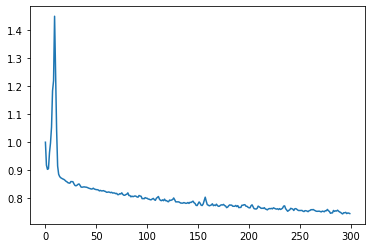

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
# x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train:', x_train.shape)
std=1e-6
H=200
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices = np.random.choice(Ntr,batch_size)

    # Forward pass
    x_tr=x_train[batch_indices]
    y_tr=y_train[batch_indices]
    h=1.0/(1.0 + np.exp(-np.matmul(x_tr,w1)-b1))
    y_pre=np.matmul(h,w2) + b2
    loss=(1/batch_size)*np.square(y_pre-y_tr).sum()  + reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    
 
    # Backward pass
    dy_pre =(1/batch_size)*2.0*(y_pre-y_tr)
    dw2= np.matmul(h.T,dy_pre) +reg*w2
    db2=dy_pre.sum(axis=0)
    dh=np.matmul(dy_pre,w2.T)
    dw1= np.matmul(x_tr.T,dh*h*(1-h)) +reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
    train_acc=1.0 -(1/batch_size)*np.count_nonzero((np.argmax(y_tr,axis=1) - np.argmax(y_pre,axis=1)))
    train_acc_history.append(train_acc)
    if t % 10==0:
        print('iteration %d : loss %f : accuracy %f '% (t,loss,train_acc))


plt.plot(loss_history)
# Printing accuracies and displaying w as images
h=1.0/(1.0 + np.exp(-np.matmul(x_train,w1)-b1))
y_pre=np.matmul(h,w2) + b2
train_acc= 1.0 - (1/Ntr)*np.count_nonzero((np.argmax(y_train,axis=1) - np.argmax(y_pre,axis=1)))
print('Training accuracy : %f'% (train_acc))

h_test=1.0/(1.0 + np.exp(-np.matmul(x_test,w1)-b1))
y_test_pre=np.matmul(h_test,w2) + b2
test_acc= 1.0 - (1/Nte)*np.count_nonzero((np.argmax(y_test,axis=1) - np.argmax(y_test_pre,axis=1)))
print('Testing accuracy : %f'% (test_acc))

